# Effect of different kernel functions on regression when hyper-parameters are tuned:


Let us again start simple and go forward. Again let us consider the example, 
$$
f(x) = x sin(x)
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x_plot = np.linspace(0,10,1000)
y_plot = x_plot* np.sin(x_plot)


### Data generation:

Lets generate n = 7 data points uniformly spaced and lets perform GPR on the data.

In [58]:
n = 7
x_train = np.linspace(0,10, n)
y_train = x_train * np.sin(x_train)


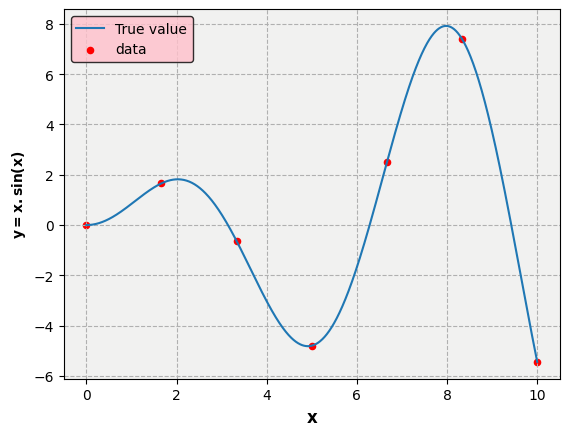

In [59]:
plt.grid("on",linestyle="--")
plt.rcParams['axes.facecolor'] = '#f1f1f0'


plt.plot(x_plot,y_plot,label="True value")
plt.scatter(x_train,y_train, color= "red",marker = "o",s = 20, label = "data")

plt.xlabel("$\mathbf{x}$", fontweight="bold", fontsize=12)
plt.ylabel("$\mathbf{y = x. sin(x)}$")
legend=plt.legend(edgecolor="black",facecolor="pink", loc="best")

### Scaling the data

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train=x_train.reshape(-1,1)
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)

## RBF

### Fitting the GPR model for RBF


In [61]:
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RBF

kernel_RBF = 1*RBF(length_scale=1,length_scale_bounds = [1e-10, 1e2])
gp_RBF = GPR(kernel=kernel_RBF,n_restarts_optimizer=100, random_state=1)
gp_RBF.max_iter_pred=100000
gp_RBF.fit(x_train_scaled,y_train)
gp_RBF.kernel_

4.08**2 * RBF(length_scale=0.0167)

### Prediction and plots for RBF

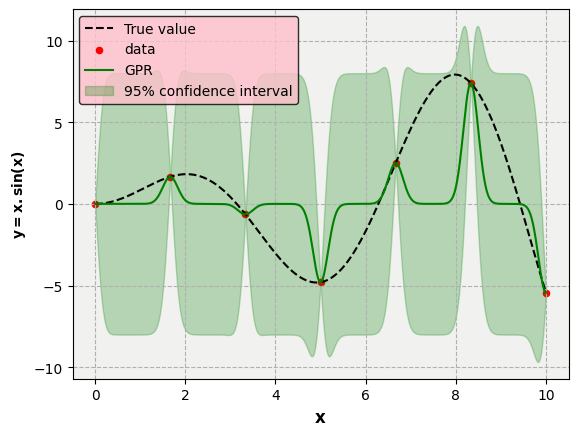

In [62]:
x_test = np.linspace(0,10,1000)
x_test_scaled = x_test.reshape(-1,1)
x_test_scaled = scaler.transform(x_test_scaled)
[y_test_mean_RBF,y_test_std_RBF] = gp_RBF.predict(x_test_scaled,return_std= True)


plt.grid("on",linestyle="--")
plt.rcParams['axes.facecolor'] = '#f1f1f0'


plt.plot(x_plot,y_plot,color="black",linestyle="--",label="True value")
plt.scatter(x_train,y_train, color= "red",marker = "o",s = 20, label = "data")
plt.plot(x_test.ravel(), y_test_mean_RBF,color="green",label="GPR")
plt.fill_between(x_test.ravel(),
                 y_test_mean_RBF+1.96*y_test_std_RBF,
                y_test_mean_RBF-1.96*y_test_std_RBF,
                alpha=0.25,
                color="green", label="95% confidence interval")

plt.xlabel("$\mathbf{x}$", fontweight="bold", fontsize=12)
plt.ylabel("$\mathbf{y = x. sin(x)}$")
legend=plt.legend(edgecolor="black",facecolor="pink", loc="best")

## Matern
### Fitting the GPR model for Matern

In [63]:
from sklearn.gaussian_process.kernels import Matern

kernel_Matern = 1*Matern(length_scale=1,length_scale_bounds = [1e-10, 1e2],nu=3)
gp_Matern = GPR(kernel=kernel_Matern,n_restarts_optimizer=100, random_state=1)
gp_Matern.max_iter_pred=10000000
gp_Matern.fit(x_train_scaled,y_train)
gp_Matern.kernel_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-10. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


4.08**2 * Matern(length_scale=1e-10, nu=3)

### Prediction and plots for Matern


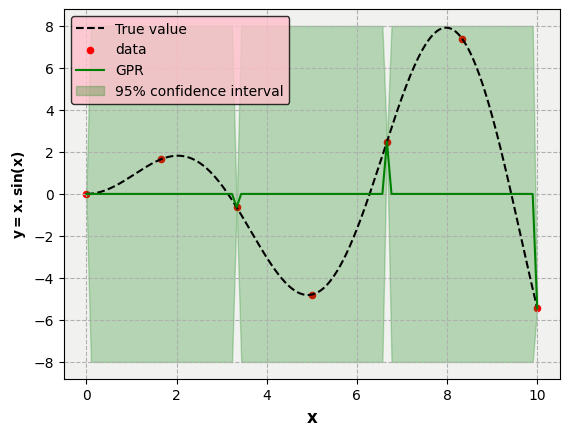

In [64]:
x_test = np.linspace(0,10,100)
x_test_scaled = x_test.reshape(-1,1)
x_test_scaled = scaler.transform(x_test_scaled)
[y_test_mean_Matern,y_test_std_Matern] = gp_Matern.predict(x_test_scaled,return_std= True)


plt.grid("on",linestyle="--")
plt.rcParams['axes.facecolor'] = '#f1f1f0'


plt.plot(x_plot,y_plot,color="black",linestyle="--",label="True value")
plt.scatter(x_train,y_train, color= "red",marker = "o",s = 20, label = "data")
plt.plot(x_test.ravel(), y_test_mean_Matern,color="green",label="GPR")
plt.fill_between(x_test.ravel(),
                 y_test_mean_Matern+1.96*y_test_std_Matern,
                y_test_mean_Matern-1.96*y_test_std_Matern,
                alpha=0.25,
                color="green", label="95% confidence interval")

plt.xlabel("$\mathbf{x}$", fontweight="bold", fontsize=12)
plt.ylabel("$\mathbf{y = x. sin(x)}$")
legend=plt.legend(edgecolor="black",facecolor="pink", loc="best")

## Rational Quadradtic kernel

### Fitting the GPR model for Rational Quadradtic kernel

In [65]:
from sklearn.gaussian_process.kernels import RationalQuadratic as RQ
kernel_RQ = 1*RQ(length_scale=1,length_scale_bounds = [1e-10, 1e2], alpha_bounds=(1e-10, 1e10))
gp_RQ = GPR(kernel=kernel_RQ,n_restarts_optimizer=100, random_state=1)
gp_RQ.max_iter_pred=100000
gp_RQ.fit(x_train_scaled,y_train)
gp_RQ.kernel_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__alpha is close to the specified upper bound 10000000000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-10. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


4.08**2 * RationalQuadratic(alpha=1e+10, length_scale=1e-10)

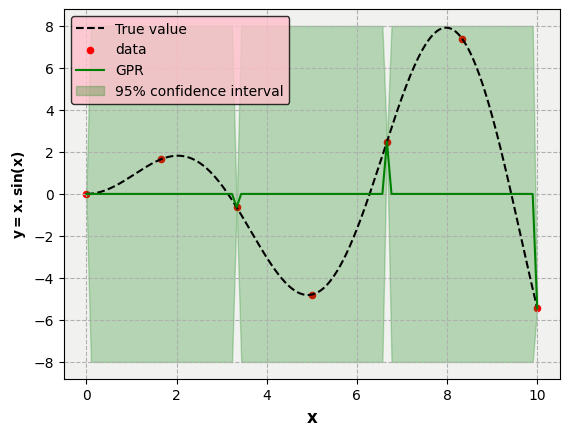

In [66]:
x_test = np.linspace(0,10,100)
x_test_scaled = x_test.reshape(-1,1)
x_test_scaled = scaler.transform(x_test_scaled)
[y_test_mean_RQ,y_test_std_RQ] = gp_RQ.predict(x_test_scaled,return_std= True)


plt.grid("on",linestyle="--")
plt.rcParams['axes.facecolor'] = '#f1f1f0'


plt.plot(x_plot,y_plot,color="black",linestyle="--",label="True value")
plt.scatter(x_train,y_train, color= "red",marker = "o",s = 20, label = "data")
plt.plot(x_test.ravel(), y_test_mean_RQ,color="green",label="GPR")
plt.fill_between(x_test.ravel(),
                 y_test_mean_RQ+1.96*y_test_std_RQ,
                y_test_mean_RQ-1.96*y_test_std_RQ,
                alpha=0.25,
                color="green", label="95% confidence interval")

plt.xlabel("$\mathbf{x}$", fontweight="bold", fontsize=12)
plt.ylabel("$\mathbf{y = x. sin(x)}$")
legend=plt.legend(edgecolor="black",facecolor="pink", loc="best")